In [11]:
import cv2
import numpy as np

# Reading the video
vidcap = cv2.VideoCapture('./cutvideo.mp4')
success, image = vidcap.read()
count = 0
success = True
idx = 0

# Get the frame rate of the input video
fps = vidcap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('./output_video.mp4', fourcc, fps, (image.shape[1], image.shape[0]))

# Read the video frame by frame and process
while success:
    # converting into hsv image
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # green range
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([70, 255, 255])
    # blue range
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Red range
    lower_red = np.array([0, 31, 255])
    upper_red = np.array([176, 255, 255])

    # white range
    lower_white = np.array([0, 0, 0])
    upper_white = np.array([0, 0, 255])

    # Define a mask ranging from lower to upper
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # Do masking
    res = cv2.bitwise_and(image, image, mask=mask)
    # convert to hsv to gray
    res_bgr = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)
    res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

    # Defining a kernel to do morphological operation in the threshold image to
    # get better output.
    kernel = np.ones((13, 13), np.uint8)
    thresh = cv2.threshold(res_gray, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # find contours in the threshold image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    prev = 0
    font = cv2.FONT_HERSHEY_SIMPLEX

    for c in contours:
        x, y, w, h = cv2.boundingRect(c)

        # Detect players
        if h >= (1.5) * w:
            if w > 15 and h >= 15:
                idx = idx + 1
                player_img = image[y:y + h, x:x + w]
                player_hsv = cv2.cvtColor(player_img, cv2.COLOR_BGR2HSV)
                # If player has a blue jersey
                mask1 = cv2.inRange(player_hsv, lower_blue, upper_blue)
                res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
                res1 = cv2.cvtColor(res1, cv2.COLOR_HSV2BGR)
                res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2GRAY)
                nzCount = cv2.countNonZero(res1)
                # If player has a red jersey
                mask2 = cv2.inRange(player_hsv, lower_red, upper_red)
                res2 = cv2.bitwise_and(player_img, player_img, mask=mask2)
                res2 = cv2.cvtColor(res2, cv2.COLOR_HSV2BGR)
                res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2GRAY)
                nzCountred = cv2.countNonZero(res2)

                if nzCount >= 20:
                    # Mark blue jersey players as France
                    cv2.putText(image, 'France', (x - 2, y - 2), font, 0.8, (255, 0, 0), 2, cv2.LINE_AA)
                    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
                else:
                    pass
                if nzCountred >= 20:
                    # Mark red jersey players as Belgium
                    cv2.putText(image, 'Belgium', (x - 2, y - 2), font, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)
                else:
                    pass
        if (h >= 1 and w >= 1) and (h <= 30 and w <= 30):
            player_img = image[y:y + h, x:x + w]

            player_hsv = cv2.cvtColor(player_img, cv2.COLOR_BGR2HSV)
            # white ball detection
            mask1 = cv2.inRange(player_hsv, lower_white, upper_white)
            res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
            res1 = cv2.cvtColor(res1, cv2.COLOR_HSV2BGR)
            res1 = cv2.cvtColor(res1, cv2.COLOR_BGR2GRAY)
            nzCount = cv2.countNonZero(res1)

            if nzCount >= 3:
                # detect football
                cv2.putText(image, 'football', (x - 2, y - 2), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Write the frame to the output video
    out.write(image)

    print('Read a new frame: ', success)  # save frame as JPEG file
    count += 1
    
    # Display the frame
    cv2.imshow('Match Detection', image)
    
    # Introduce a delay between frames to control the video speed
    delay_time = 23  # Adjust this value to decrease or increase the speed
    if cv2.waitKey(delay_time) & 0xFF == ord('q'):
        break
    
    # Read the next frame
    success, image = vidcap.read()

# Release the VideoCapture and VideoWriter objects
vidcap.release()
out.release()
cv2.destroyAllWindows()



import math
import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image
from statsbombpy import sb
from mplsoccer import VerticalPitch

df = sb.events(match_id=3869685).sort_values(by=['index'])

df = df[df['period'] < 5] # Remove any data from penalty shootouts

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [12]:
# Split the data into two teams
team1 = df[df.team == 'Argentina']
team2 = df[df.team == 'France']

In [13]:
# Set a couple of constants for the colors
FRANCE_COLOR = '#002654'
ARGENTINA_COLOR = '#43A1D5'
ARGENTINA_TEAM_ID = 779
FRANCE_TEAM_ID = 771

# Now that we have our data, let's create our visualization
First let's grab code we have used before to create our shotmaps, pass networks and xG flow charts

We'll also be using the `add_axes` method to create our subplots. This method allows us to specify the position of the subplot in the figure. 
The arguments are [left, bottom, width, height] where all values are in the range 0 to 1.

In [14]:
# Let's create our functions for shotmaps and passnetworks
def create_shotmap(team, ax):
    pitch = VerticalPitch(pitch_type='statsbomb', half=True)
    pitch.draw(ax=ax)
    
    # the shots data is in the 'type' column
    team = team[team['type']=='Shot']
    
    # Filter down to just the columns we need
    team = team[['team', 'player', 'location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_type']]
    team[['x', 'y']] = team['location'].apply(pd.Series)
    
    # Draw the shotmap
    for x in team.to_dict(orient='records'):
    
        pitch.scatter(
            x=x['x'], y=x['y'], ax=ax, 
            s=500 * x['shot_statsbomb_xg'], 
            color='green' if x['shot_outcome'] == 'Goal' else 'white', 
            edgecolors='black', alpha=0.7
        )

In [15]:
def create_passnetwork(team, ax):
    team[['x', 'y']] = team['location'].apply(pd.Series)
    
    tactics = team[~team['tactics'].isnull()][['tactics', 'team']]

    all_jersey_numbers = []
    for y in tactics.to_dict(orient='records'):
        all_jersey_numbers.append(pd.DataFrame([{'player_id': x['player']['id'], 'jersey_number': x['jersey_number']} for x in y['tactics']['lineup']]))
        
    jersey_numbers = pd.concat(all_jersey_numbers).drop_duplicates()
    
    # Make a new, single column for time and sort the events in chronological order
    team["newsecond"] = 60 * team["minute"] + team["second"]
    
    team.sort_values(by=['newsecond'])
    
    # identify the passer and then the recipient, who'll be the playerId of the next action
    team['passer'] = team['player_id']
    
    team['recipient'] = team['passer'].shift(-1)
    
    # filter for only passes and then successful passes
    passes_df = team.loc[(team['type']=="Pass")]
    passes_df['pass_outcome'] = passes_df['pass_outcome'].fillna("Successful")
    
    completions = passes_df.loc[(passes_df['pass_outcome'] == "Successful")]
    
    #find time of the team's first substitution and filter the df to only passes before that
    sub_df = team.loc[(team['type'] == "Substitution")]
    first_sub = sub_df["newsecond"].min()
    
    if first_sub <= (60 * 45):
        first_sub = 60 * 45
    
    completions = completions.loc[completions['newsecond'] < first_sub]
    
    # Find Average Locations
    average_locs_and_count = completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count.columns = ['x', 'y', 'count']
    
    # find number of passes along each 'path' of passer to recipient
    passes_between = completions.groupby(['passer', 'recipient']).id.count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)
    
    passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
    passes_between = passes_between.merge(
        average_locs_and_count, left_on='recipient', right_index=True, suffixes=['', '_end']
    )
    
    # set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
    passes_between = passes_between.loc[(passes_between['pass_count'] >= 4)]
    
    # plot arrows
    def pass_line_template(ax, x, y, end_x, end_y, line_color):
        ax.annotate(
            '',
            xy=(end_y,  end_x),
            xytext=(y, x),
            zorder=1,
            arrowprops=dict(arrowstyle='-|>', linewidth=4, color=line_color, alpha=.85)
        )
        
    def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
        dist = math.hypot(end_x - x, end_y - y)
        angle = math.atan2(end_y-y, end_x-x)
        upd_x = x + (dist - dist_delta) * math.cos(angle)
        upd_y = y + (dist - dist_delta) * math.sin(angle)
        pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    pitch = VerticalPitch(pitch_type='statsbomb')
    pitch.draw(ax=ax)
    
    for index, row in passes_between.iterrows():
        pass_line_template_shrink(ax, row['x'], row['y'], row['x_end'], row['y_end'], 'black')
    
    # plot nodes
    pitch.scatter(
        average_locs_and_count.x, average_locs_and_count.y, s=500,
        color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2
    )
    
    for index, row in average_locs_and_count.iterrows():
        pitch.annotate(
            jersey_numbers[jersey_numbers['player_id'] == row.name]['jersey_number'].values[0],
            xy=(row.x, row.y),
            c='#132743',
            va='center',
            ha='center',
            size=10,
            fontweight='bold',
            ax=ax
        )

In [16]:
def create_table(team1, team2):
    # Drop rows where the pass_outcome is Unknown
    team1 = team1[team1['pass_outcome'] != 'Unknown']
    team2 = team2[team2['pass_outcome'] != 'Unknown']
    
    # Create a table with the data
    # We first need to calculate the statistics for each team
    # we will calcualte the following stats:
    # - goals
    # - xG
    # - shots
    # - shots on target
    # - passes
    # - pass completion %
    
    # Create a dictionary to store the stats
    stats = {
        'goals': {'team1': len(team1[team1['type'] == 'Goal']), 'team2': len(team2[team2['type'] == 'Goal'])},
        'xG': {'team1': round(team1['shot_statsbomb_xg'].sum(), 2), 'team2': round(team2['shot_statsbomb_xg'].sum(), 2)},
        'shots': {'team1': len(team1[team1['type'] == 'Shot']), 'team2': len(team2[team2['type'] == 'Shot'])},
        'shots_on_target': {
            'team1': len(team1[(team1['type'] == 'Shot') & (team1['shot_end_location'].str.len() > 2) & (team1['shot_outcome'] != 'Off T')]), 
            'team2': len(team2[(team2['type'] == 'Shot') & (team2['shot_end_location'].str.len() > 2) & (team2['shot_outcome'] != 'Off T')])
        },
        'passes': {'team1': len(team1[team1['type'] == 'Pass']), 'team2': len(team2[team2['type'] == 'Pass'])},
        'pass_completion': {
            'team1': round(len(team1[(team1['type'] == 'Pass') & (team1['pass_outcome'].isna())]) / len(team1[team1['type'] == 'Pass']) * 100, 2) ,
            'team2': round(len(team2[(team2['type'] == 'Pass') & (team2['pass_outcome'].isna())]) / len(team2[team2['type'] == 'Pass']) * 100, 2)
        }
    }
    
    # store as a dataframe
    stats_df = pd.DataFrame(stats).T

    column_labels = ['', '', '']
    table_vals = [
        [str(stats_df['team1']['xG']), 'xG', str(stats_df['team2']['xG'])],
        [str(stats_df['team1']['shots']), 'Shots', str(stats_df['team2']['shots'])],
        [str(stats_df['team1']['shots_on_target']), 'Shots on Target', str(stats_df['team2']['shots_on_target'])],
        [str(stats_df['team1']['passes']), 'Passes', str(stats_df['team2']['passes'])],
        [str(stats_df['team1']['pass_completion']), 'Pass Completion %', str(stats_df['team2']['pass_completion'])]
    ]
    
    return column_labels, table_vals

In [17]:
def create_xg_flow_chart(df, ax):
    # We'll use the original df instead of the team1 and team2 dataframes
    
    # Filter the columns to only shots
    df = df[df['type'] == 'Shot']
    
    # Sort the values so they are in order of time
    df = df.sort_values(by="index")
    
    # Calculate the cumulative xG for each team
    df['cumulative_xG'] = df.groupby('team_id')['shot_statsbomb_xg'].cumsum()
    
    # Plot the xG for each team by half
    # We want to make it so the lines both start at 0
    for team in df['team_id'].unique():
        
        team_df = df[df['team_id'] == team]
        
        # add a 0 xG row at the start of the match
        team_df = pd.concat([pd.DataFrame({
            'team_id': team, 'minute': 0, 'shot_statsbomb_xg': 0, 'shot_outcome': None, 'cumulative_xG': 0, 'period': 1
        }, index=[0]), team_df])
        
        ax.plot(
            team_df['minute'], 
            team_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=ARGENTINA_COLOR if team == ARGENTINA_TEAM_ID else FRANCE_COLOR
        )   
            
    
    # We Can add a scatter plot to show the goals
    for team in df['team_id'].unique():
        team_df = df[(df['team_id'] == team) & (df['shot_outcome'] == 'Goal')].to_dict(orient='records')
        for x in team_df:
            ax.scatter(
                x['minute'], 
                x['cumulative_xG'], 
                c='white',
                edgecolor=ARGENTINA_COLOR if team == ARGENTINA_TEAM_ID else FRANCE_COLOR,
                s=100,
                # We want the goals to be on top of the lines
                zorder=5
            )
            
            # add a label to the goals for the player who scored
            # ax.text(
            #     x['minute'], 
            #     x['cumulative_xG'] - .07, 
            #     x['player'], 
            #     ha='center', 
            #     va='center', 
            #     fontfamily='monospace', 
            #     fontsize=8,
            #     zorder=10
            # )
            
    # Let's label the x axis with first and second half
    # ax.set_xticks([0, 45, 90, 120])
    # ax.set_xticklabels(['0\'', '45\'', '90\'', '120\''])
    
    # # Let's get rid of the right and top spines
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)

    

C:\Users\Ayush\AppData\Local\Temp\ipykernel_10576\4017582264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[['x', 'y']] = team['location'].apply(pd.Series)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_10576\4017582264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[['x', 'y']] = team['location'].apply(pd.Series)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_10576\4017582264.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

(-4.0, 84.0, 56.0, 124.0)

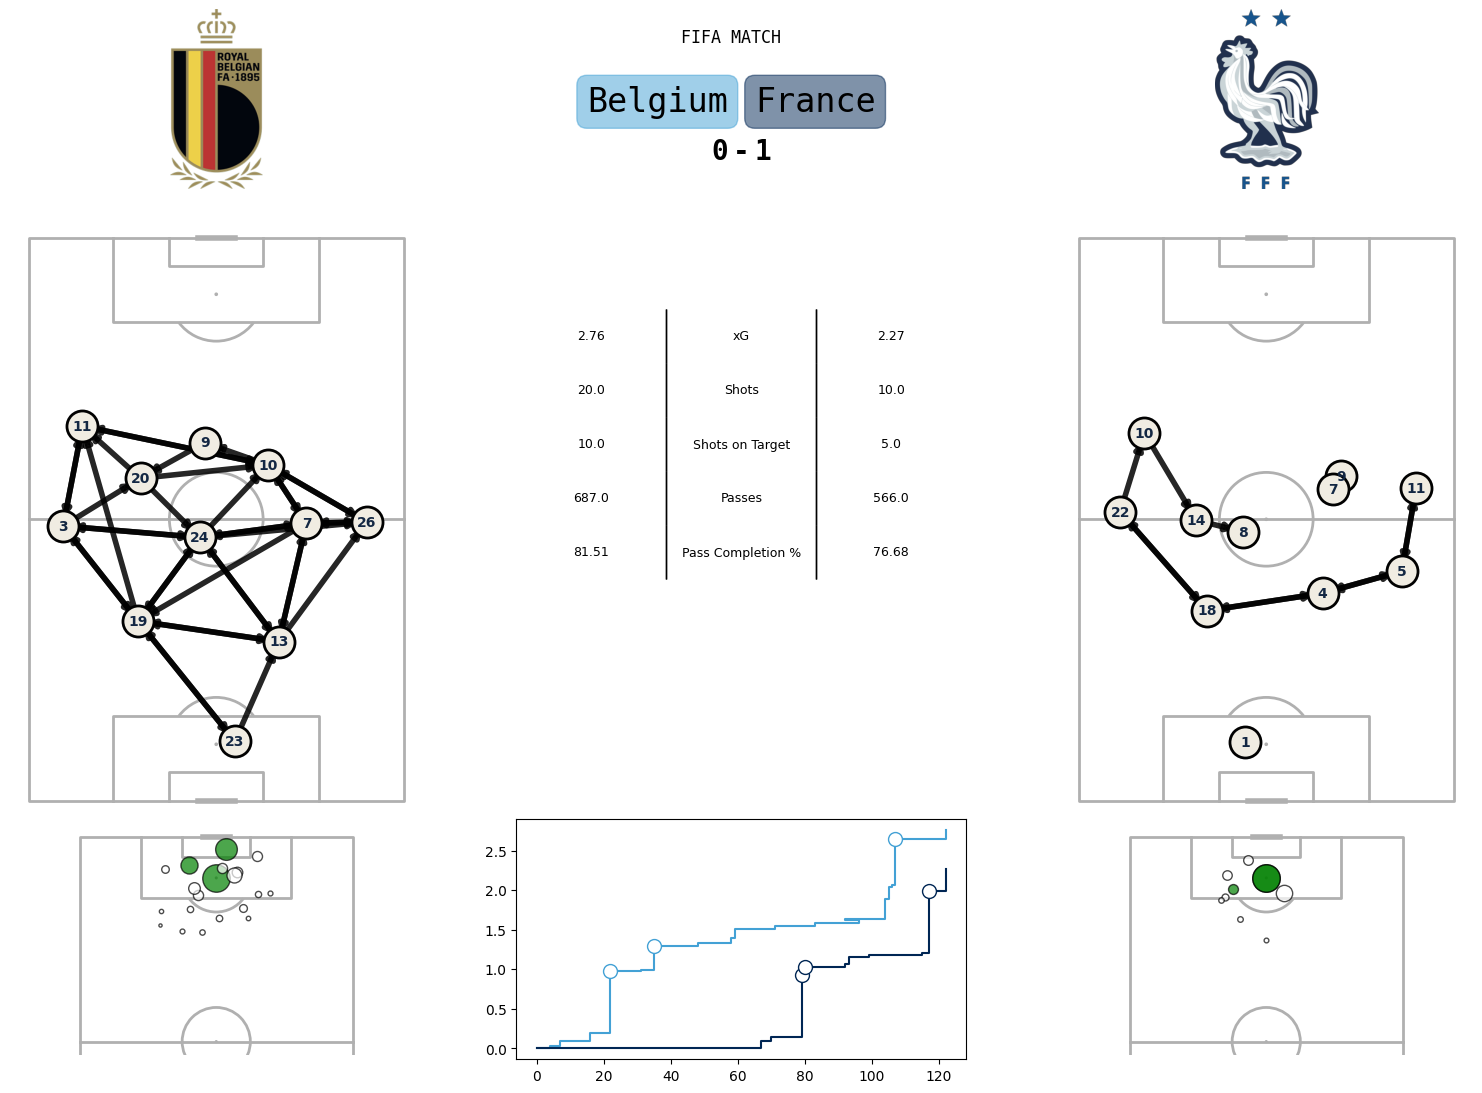

In [18]:
# Set up the figure and grid layout
fig = plt.figure(figsize=(15, 12))

# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0.225, 0.775, 0.15, 0.15])

# get the image from the team_logos folder
team1_img = Image.open('../team_logos/belgium_logo.png')
ax1.imshow(team1_img)
ax1.axis('off')

ax2 = fig.add_axes([0.5, 0.8, 0.3, 0.1])
ax2.text(0.5, 0.8, 'FIFA MATCH  \n', fontsize=12, ha='center', fontdict={'family': 'monospace'})

team_1_text = ax2.text(0.47, .4, 'Belgium', fontsize=24, ha='right', fontdict={'family': 'monospace'})
team_1_text.set_bbox(dict(facecolor='#43A1D5', alpha=0.5, edgecolor='#43A1D5', boxstyle='round'))


team_2_text = ax2.text(0.53, .4, 'France', fontsize=24, ha='left', fontdict={'family': 'monospace'})
team_2_text.set_bbox(dict(facecolor='#002654', alpha=0.5, edgecolor='#002654', boxstyle='round'))

ax2.text(0.47, 0, '0', fontsize=20, ha='right', fontdict={'family': 'monospace', 'weight': 'bold'})
ax2.text(0.5, 0, '-', fontsize=20, ha='center', fontdict={'family': 'monospace', 'weight': 'bold'})
ax2.text(0.53, 0, '1', fontsize=20, ha='left', fontdict={'family': 'monospace', 'weight': 'bold'})


ax2.axis('off')

ax3 = fig.add_axes([0.925, 0.775, 0.15, 0.15])
# get the image from the team_logos folder
team2_img = Image.open('../team_logos/france_logo.png')
ax3.imshow(team2_img)
ax3.axis('off')


# ax4 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_axes([0.15, 0.25, 0.3, 0.5])
create_passnetwork(team1, ax4)
ax4.axis('off')

ax5 = fig.add_axes([0.5, 0.2, 0.3, 0.5])
# create a table with data. The middle column will be the statistic with the left and right columns being the stats for each team
column_labels, table_vals = create_table(team1, team2)

table = ax5.table(
    cellText=table_vals, 
    cellLoc='center', 
    edges='vertical',
    bbox=[0, .5, 1, .45],
)

table.set_fontsize(14)

for (i, j), cell in table.get_celld().items():
    if j == 0:
        table.get_celld()[(i, j)].visible_edges = 'R'
    elif j == 2:
        table.get_celld()[(i, j)].visible_edges = 'L'
    else:
        table.get_celld()[(i, j)].visible_edges = 'LR'

ax5.axis('off')

ax6 = fig.add_axes([0.85, 0.25, 0.3, 0.5])
create_passnetwork(team2, ax6)
# ax6.axis('off')

ax7 = fig.add_axes([0.2, 0.05, 0.2, 0.2])
create_shotmap(team1, ax7)
# ax7.axis('off')

ax8 = fig.add_axes([0.5, 0.05, 0.3, 0.2])
create_xg_flow_chart(df, ax8)
# ax8.axis('off')

ax9 = fig.add_axes([0.9, 0.05, 0.2, 0.2])
create_shotmap(team2, ax9)
ax9.axis('off')

In [19]:
# save the figure
fig.savefig('Detection_output.png', dpi=300, bbox_inches='tight')
